<h1 align="center" style="color: #fff; background-color: #000; padding: 10px; font-size: 36px;">The Flight Price Predictor</h1>

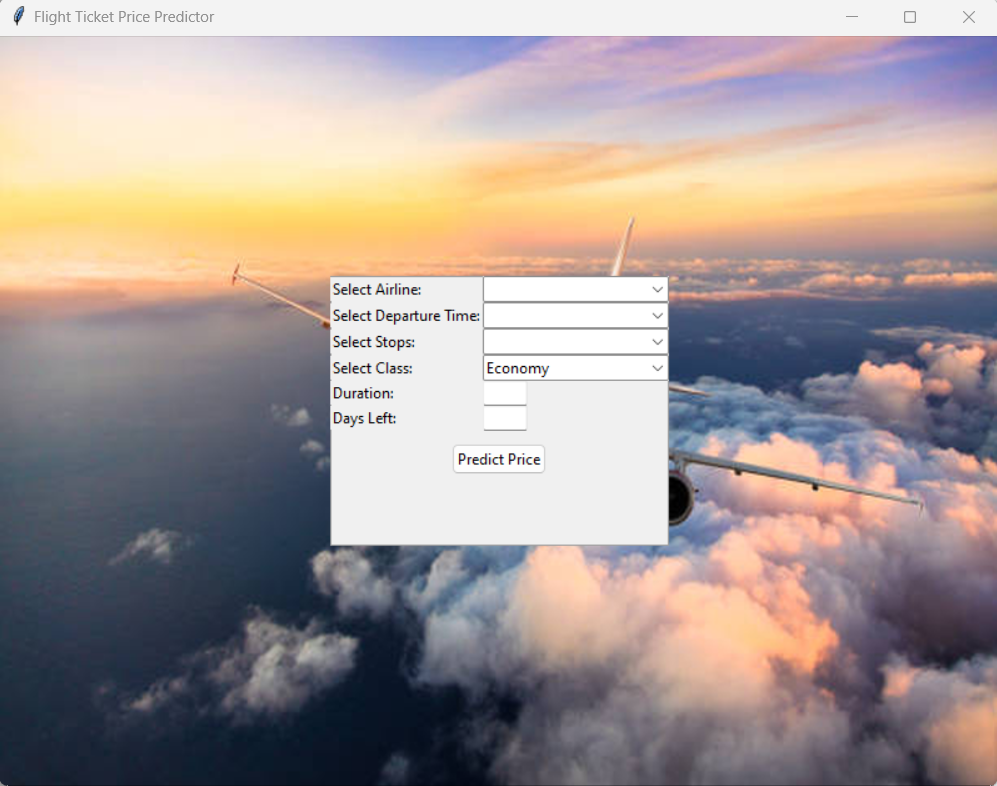

<u>Dataset</u> 
-------------

The data is taken from: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

<u>Objective</u>
-------------

The aim of this project is to predict Target or dependent variable, Ticket price based on the independent variables :-
>* Airline (airline)
>* Source and destination (source_city , destination_city)
>* Time of departure and arrival (departure_time , arrival_time)
>* Seat type (class)
>* Number days before days before the travel (days_left)


<h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Business Understanding  </h1>

The objective of the study is to analyse the flight booking dataset obtained and to conduct various statistical hypothesis tests in order to get meaningful information from it. Have you ever wondered why plane ticket prices seem to jump around at random? This is actually the product of a carefully calculated algorithm that airlines use to maximize their profits by balancing individual ticket pricing and the capacity of the plane. The price of a plane ticket is constantly changing based on current demand for a flight, the number of seats available, and the timing of booking. Our aim is to predict the price of the ticket fare.

<h1 align="center"  style=" color:#fff; background-color:#969696; padding:10px;">Data understanding </h1>


Dataset contains information about flight booking options between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. .

## <u>Features</u>
The various features of the dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: The City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: The City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

#### Importing Libraries

In [64]:
# Import python libraries 

import pandas as pd #for data frame
import numpy as np  #for numeric calulation
import seaborn as sns #for Visualization
import matplotlib.pyplot as plt #for Visualization
%matplotlib inline

# Data Collection

In [65]:
# Import data 'Flight Price Prediction.csv' using pandas.

flightdf = pd.read_csv('/kaggle/input/flight/Clean_Dataset.csv')
flightdf

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Data Exploration

In [66]:
flightdf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [67]:
# display the column names 

flightdf.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [68]:
#display the number of rows and columns

flightdf.shape


(300153, 12)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings: </b> The dataset contains 300153 rows and 12 columns </b> 
</div>

In [69]:
flightdf.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> In the dataset, there are four numerical variables, one of which is the target variable 'price,' and the remaining are categorical variables </b>. 
</div>

In [70]:
flightdf.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> The minimum price of a flight ticket is 1105 when compared with the maximum fare 123071 </b>. 
</div>

In [71]:
#Displaying the first five rows of the dataset

flightdf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [72]:
unique_counts = flightdf.nunique()
print(unique_counts)


Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64


# Data Cleaning

In [73]:
#Dropping the column "Unnamed: 0"

flightdf.drop('Unnamed: 0', axis = 1, inplace= True)


In [74]:
flightdf.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> Due to the presence of just 8 missing values in the target variable "price," we will proceed by eliminating these specific rows from the dataset. This decision is based on the small number of missing values, making their removal a reasonable choice.  </b>. 
</div>

In [75]:
#Removing the 8 missing values in the price column
flightdf.dropna(subset=['price'], inplace=True)

In [76]:
# code is using NumPy's np.where function to update values in the 'airline' column of the DataFrame dataset. 
# Specifically, it's checking if the value in the 'airline' column is equal to 'GO_FIRST', and 
# if so, it replaces it with 'Go_First'. Otherwise, it leaves the value unchanged.

# flightdf['airline']=np.where(flightdf['airline']=='GO_FIRST','Go_First', flightdf['airline'])

# Data Visualization

# To Do - Keeping the questions for now so we can use them in report, should be removed later

### We are going to analyze the below questions by means of Data Visualization :-

>* How does the ticket price varies with the type of airline?
>* How does the ticket price affected when tickets are bought in 1 or 2 days before departure?
>* How does the ticket price change based on the Departure Time and Arrival Time?
>* How does the ticket price changes with change in Source city and Destination city?
>* How does the ticket price vary with the number of stops of a Flight?

#### Flight Prices by Class:

/tmp/ipykernel_47/1263381029.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='price', data=flightdf, ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


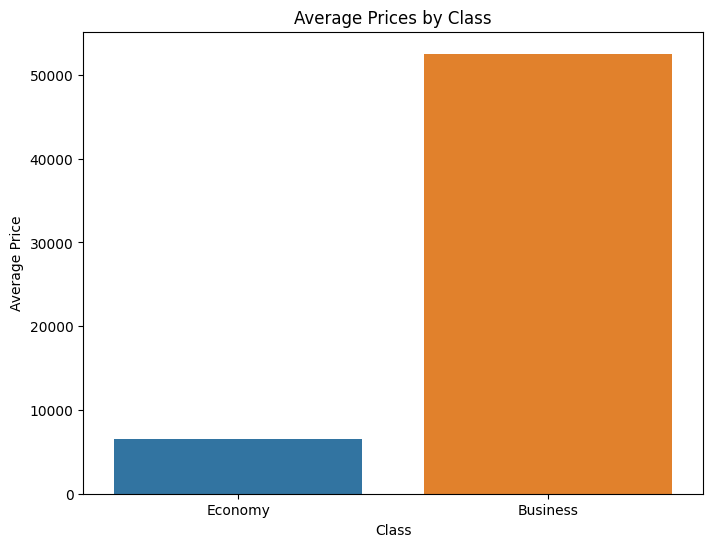

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='price', data=flightdf, ci=None)
plt.title('Average Prices by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()


# Variation in prices as per the class

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

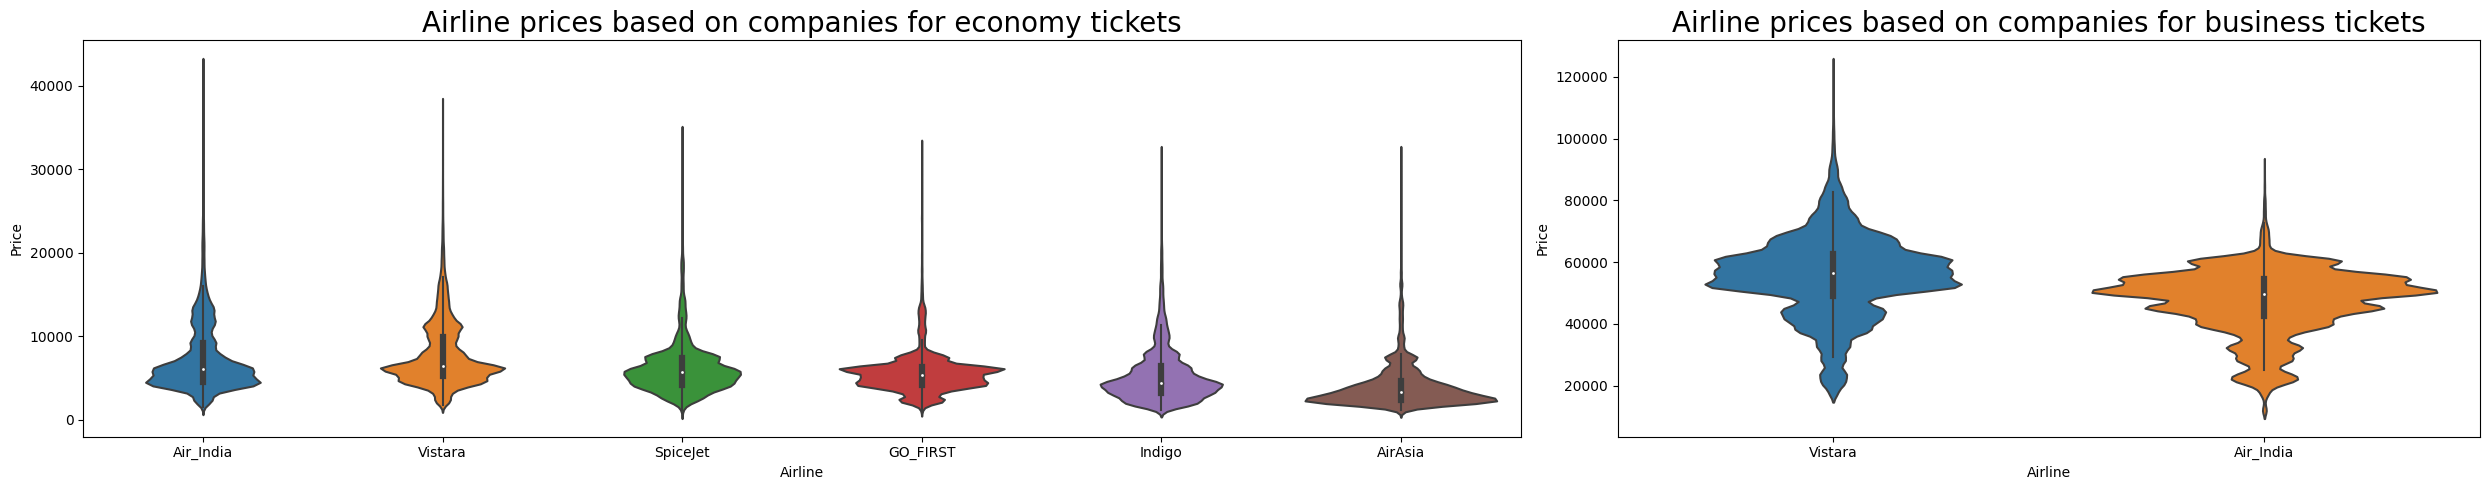

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_airline_prices(data, ticket_class, ax):
    filtered_data = data.loc[data["class"] == ticket_class].sort_values("price", ascending=False)
    sns.violinplot(y="price", x="airline", data=filtered_data, kind="boxen", ax=ax)
    ax.set_title(f"Airline prices based on companies for {ticket_class.lower()} tickets", fontsize=20)
    ax.set_xlabel('Airline')
    ax.set_ylabel('Price')

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

plot_airline_prices(flightdf, 'Economy', axs[0])
plot_airline_prices(flightdf, 'Business', axs[1])

plt.tight_layout()
plt.show()


# Price variation by Airline

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


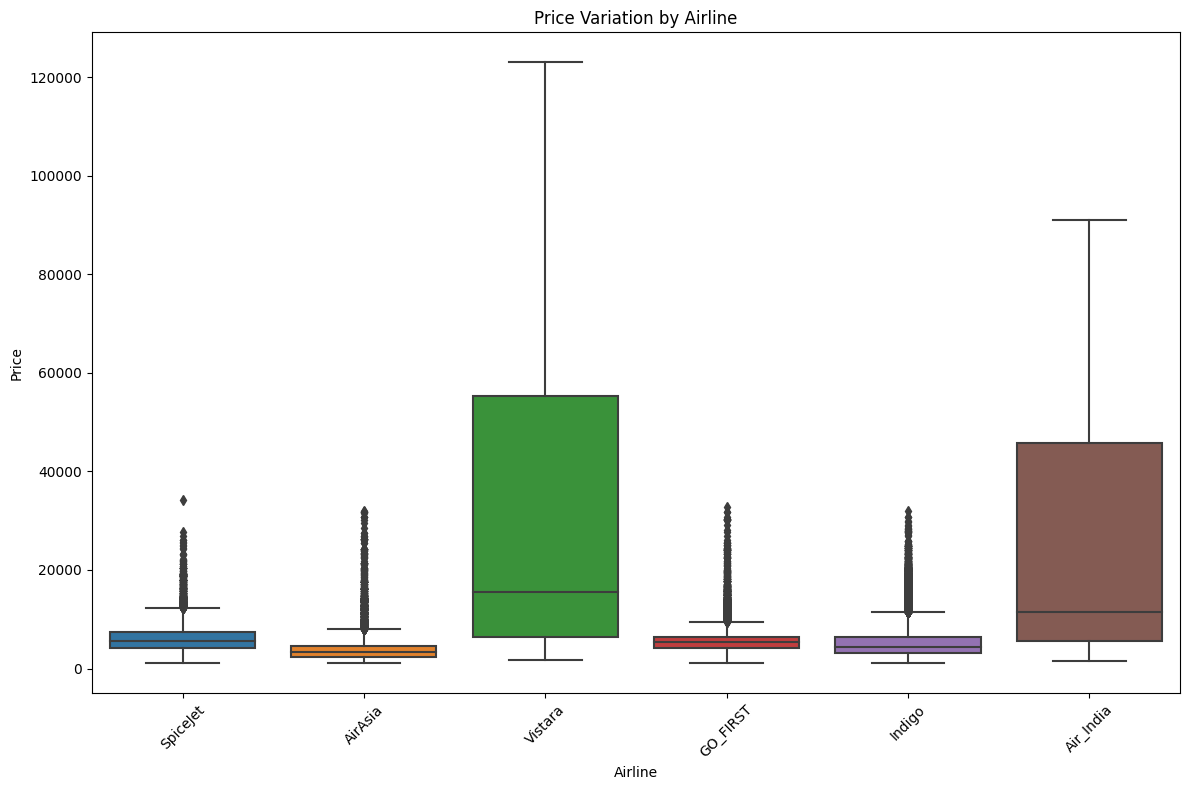

In [79]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='airline', y='price', data=flightdf)
plt.title('Price Variation by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Price Variation based on the departure time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

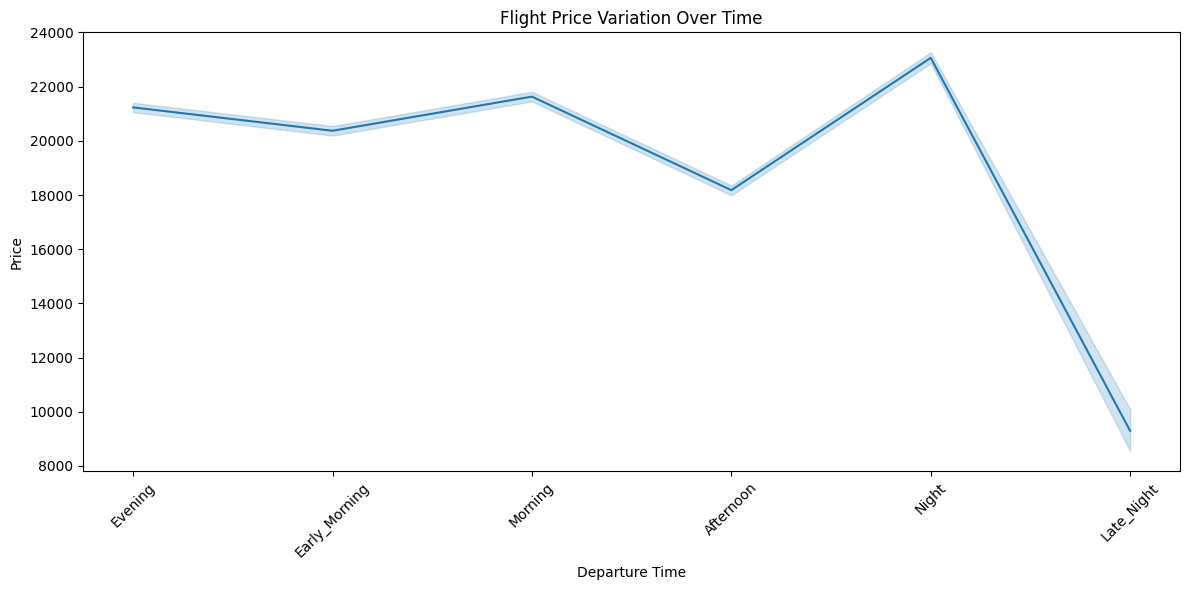

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='departure_time', y='price', data=flightdf)
plt.title('Flight Price Variation Over Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Q2- How does the ticket price affected when tickets are bought in 1 or 2 days before departure?

<Axes: xlabel='days_left', ylabel='price'>

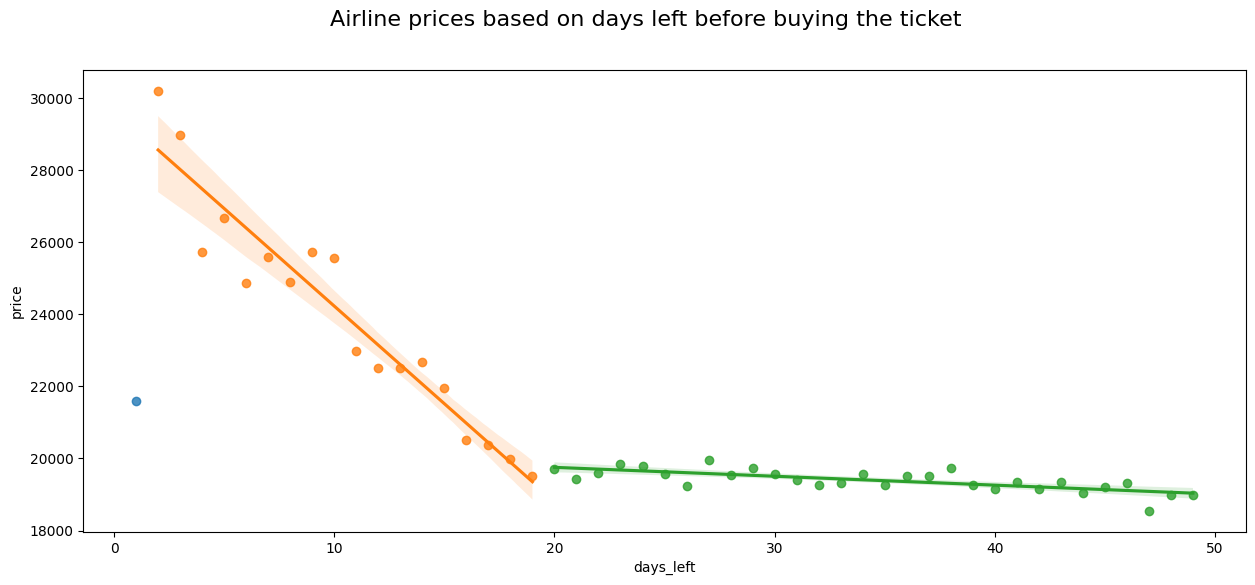

In [81]:
flightdf_temp = flightdf.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=flightdf_temp.loc[flightdf_temp["days_left"]==1].days_left, y=flightdf_temp.loc[flightdf_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=flightdf_temp.loc[(flightdf_temp["days_left"]>1)&(flightdf_temp["days_left"]<20)].days_left, y=flightdf_temp.loc[(flightdf_temp["days_left"]>1)&(flightdf_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=flightdf_temp.loc[flightdf_temp["days_left"]>=20].days_left, y=flightdf_temp.loc[flightdf_temp["days_left"]>=20].price, fit_reg=True, ax=ax)


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
The graph illustrates a gradual increase in prices until 20 days before the flight, followed by a significant drop just one day prior, resulting in prices up to three times cheaper. This pattern suggests that airlines may reduce ticket prices close to the departure date to fill empty seats and ensure high occupancy on their planes</b>. 
</div>

#### Q4- How does the ticket price changes with change in Source city and Destination city?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

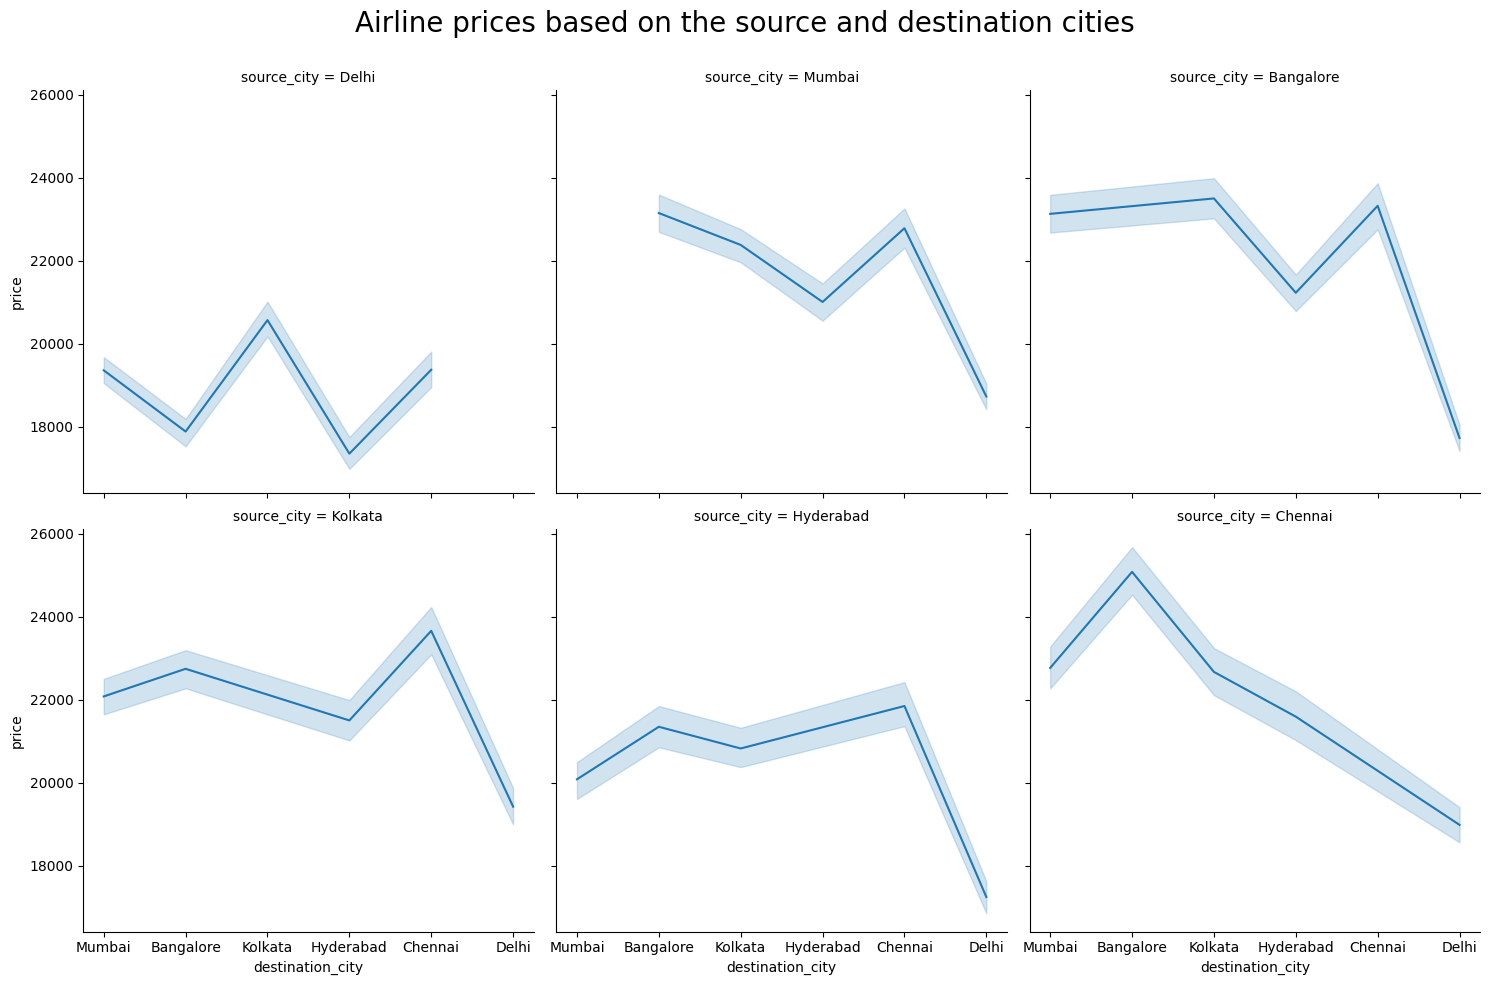

In [82]:
import seaborn as sns

plot = sns.relplot(
    col="source_city",
    y="price",
    kind="line",
    x="destination_city",
    data=flightdf,
    col_wrap=3
)
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Airline prices based on the source and destination cities', fontsize=20)


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    From this graph,it implies that flight leaving and arriving at Delhi are often cheaper whereas flights leaving and arriving at Bangalore are the high priced.
    </b>. 
</div>

#### Q5- How does the ticket price vary with the number of stops of a Flight?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

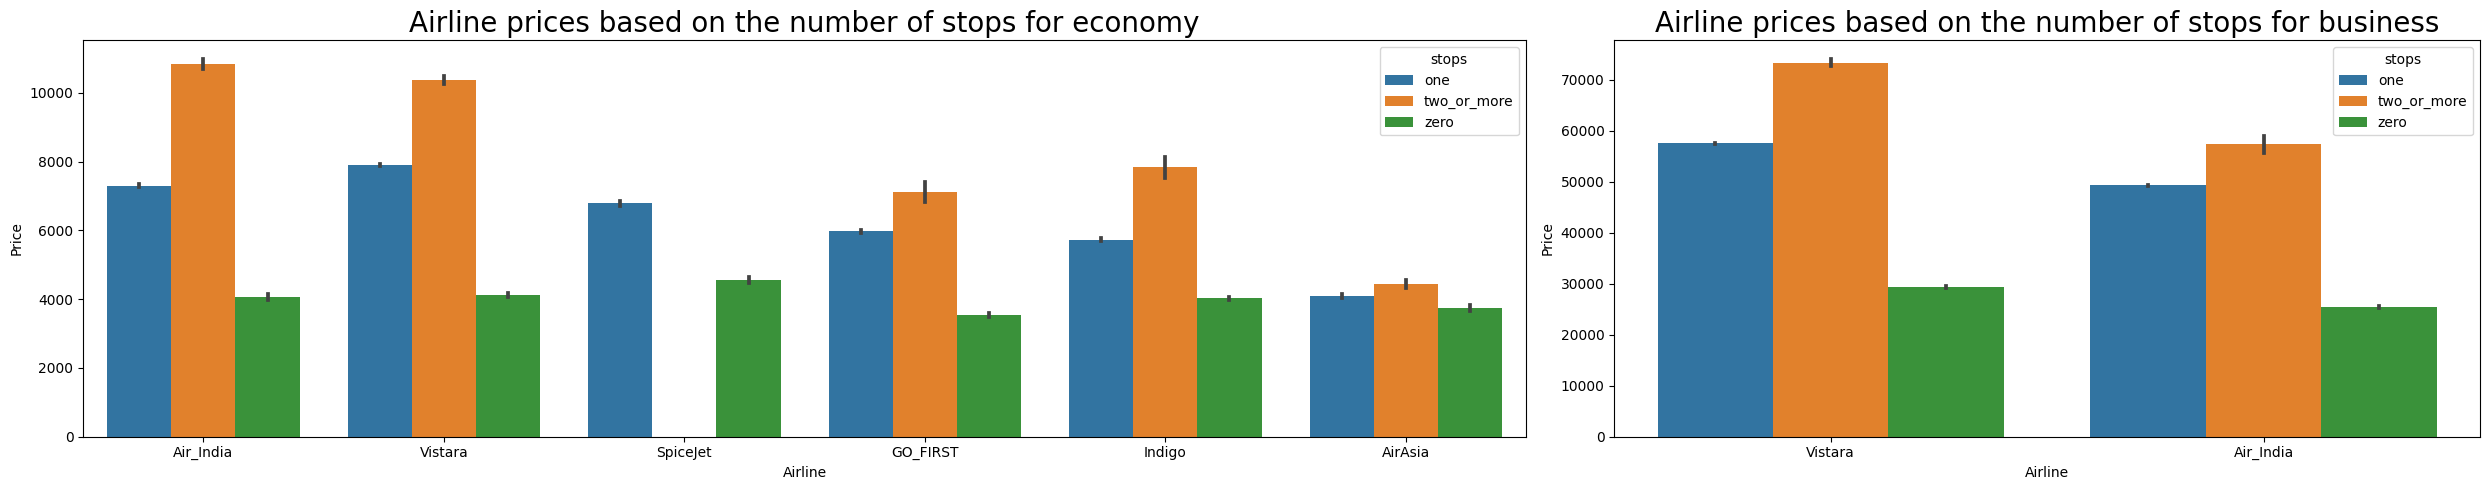

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_airline_prices_stops(data, ticket_class, ax):
    filtered_data = data.loc[data["class"] == ticket_class].sort_values("price", ascending=False)
    sns.barplot(y="price", x="airline", hue="stops", data=filtered_data, ax=ax)
    ax.set_title(f"Airline prices based on the number of stops for {ticket_class.lower()}", fontsize=20)
    ax.set_xlabel('Airline')
    ax.set_ylabel('Price')

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

plot_airline_prices_stops(flightdf, 'Economy', axs[0])
plot_airline_prices_stops(flightdf, 'Business', axs[1])

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
Clearly, the flight cost tends to increase with more stops, but AirAsia appears to be an exception with relatively stable prices. The unique behavior and analysis of AirAsia suggest that it operates as a low-cost airline company.
    </b> 
</div>

# Data Transformation

#### We are using Label encoding to transform Categorical variables into numerical values.

In [84]:
#import the LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Copy the DataFrame
flightdf_orginal = flightdf.copy()

# Apply label encoding to the specified columns
flightdf[features] = flightdf[features].apply(le.fit_transform)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [85]:
flightdf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [86]:
flightdf.dtypes

airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

# Feature selection

### Heatmap to study the correalation of the features  

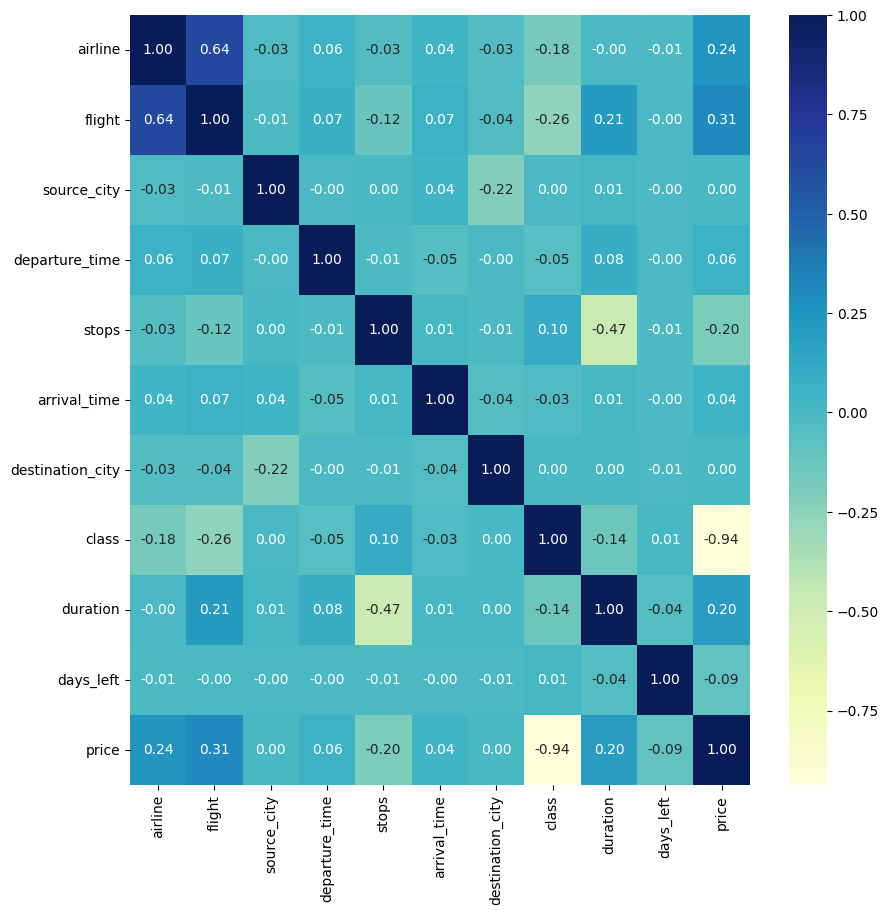

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(flightdf.corr(), annot = True, fmt=".2f", cmap='YlGnBu')
plt.show()

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    
Based on the heatmap above, it's evident that there is a strong correlation between the 'flight' and 'airline' variables. In many cases, it's beneficial to remove highly correlated independent variables from your dataset when building a machine learning model. These highly correlated features, often referred to as multicollinearity, can introduce challenges in model training and interpretation. As a result, we've decided to drop the 'flight' column from our dataset.


While 'airline' has a slightly lower correlation with the target variable 'price,' we've still chosen to eliminate 'flight' to simplify the input data for the model implementaion.

Furthermore, it's worth noting that the independent variables 'source_city' and 'destination_city' exhibit zero correlation with the target variable 'Price.' However, we've retained them in our dataset to explore the usability of other feature selection methods.</b> 
</div>

In [88]:
flightdf.drop('flight', axis = 1, inplace= True)

Since we have mostly categorical Input variable and continuous Target variable, we are using SelectKBest and selected the 6 most important features

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # Use appropriate test for regression

X = flightdf.drop('price', axis=1)
Y = flightdf['price']

k_best = SelectKBest(score_func=f_regression, k=6)  # Select top 6 features
fit = k_best.fit(X, Y)

selected_features = X.columns[fit.get_support()]
print("Selected features:", selected_features)

# Selected features' data
selected_data = X[selected_features]
print(selected_data.head())


Selected features: Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'], dtype='object')
   airline  departure_time  stops  class  duration  days_left
0        4               2      2      1      2.17          1
1        4               1      2      1      2.33          1
2        0               1      2      1      2.17          1
3        5               4      2      1      2.25          1
4        5               4      2      1      2.33          1


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    By employing a filter-based selection method, we successfully identified the six most important features through SelectKBest technique. These features are 'airline,' 'departure_time,' 'stops,' 'class,' 'duration,' and 'days_left.' Next, we will drop the unselected features from our dataframe.<b>
</b> 
</div>

In [90]:
# Droping the unselected features 
features_to_drop = [col for col in flightdf.columns if col not in selected_features and col != 'price']
flightdf.drop(features_to_drop, axis=1, inplace=True)
flightdf

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,2.17,1,5953
1,4,1,2,1,2.33,1,5953
2,0,1,2,1,2.17,1,5956
3,5,4,2,1,2.25,1,5955
4,5,4,2,1,2.33,1,5955
...,...,...,...,...,...,...,...
300148,5,4,0,0,10.08,49,69265
300149,5,0,0,0,10.42,49,77105
300150,5,1,0,0,13.83,49,79099
300151,5,1,0,0,10.00,49,81585


# Data Preprocessing

## Scaling of variables: MIN-MAX Normalization

In [91]:

#The fit_transform method of the MinMaxScaler scales the data within the specified range (0 to 1 by default) for each of the selected columns.

from sklearn.preprocessing import MinMaxScaler

# Custom new minimum and maximum values
new_min = 0
new_max = 1  # Set your desired maximum value

duration_min = flightdf['duration'].min()
duration_max = flightdf['duration'].max()
days_left_min = flightdf['days_left'].min()
days_left_max = flightdf['days_left'].max()
price_min = flightdf['price'].min()
price_max = flightdf['price'].max()
#above are for later use. 



### Scaling all the variables including the categorical

In [92]:
#Scaling all the varaibles including the categorical ones. 

# Create the MinMaxScaler with all the  feature_range 
scaler = MinMaxScaler(feature_range=(new_min, new_max))

scale_cols = ['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left','price']

 # Apply min-max scaling to the specified columns in flightdf
flightdf[scale_cols] = scaler.fit_transform(flightdf[scale_cols])

 # Display the scaled DataFrame
flightdf


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,airline,departure_time,stops,class,duration,days_left,price
0,0.8,0.4,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.2,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.8,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300148,1.0,0.8,0.0,0.0,0.188776,1.0,0.558844
300149,1.0,0.0,0.0,0.0,0.195714,1.0,0.623124
300150,1.0,0.2,0.0,0.0,0.265306,1.0,0.639473
300151,1.0,0.2,0.0,0.0,0.187143,1.0,0.659856


### Numerical Variable Scaling

In [93]:
 # Create the MinMaxScaler with custom feature_range(numerical only)
scaler = MinMaxScaler(feature_range=(new_min, new_max))

 # List of numerical columns to scale
num_cols = ['duration', 'days_left', 'price']

 # Apply min-max scaling to the specified columns in flightdf
flightdf[num_cols] = scaler.fit_transform(flightdf[num_cols])

 # Display the scaled DataFrame
flightdf

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,airline,departure_time,stops,class,duration,days_left,price
0,0.8,0.4,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.2,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.8,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300148,1.0,0.8,0.0,0.0,0.188776,1.0,0.558844
300149,1.0,0.0,0.0,0.0,0.195714,1.0,0.623124
300150,1.0,0.2,0.0,0.0,0.265306,1.0,0.639473
300151,1.0,0.2,0.0,0.0,0.187143,1.0,0.659856


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b> Scaling the categorical variables does not lead to any noticeable improvement in model accuracy; therefore, only the numerical variables are being scaled</b>. 
</div>


# Model Training

#### Splitting of input and target variables

In [94]:
Y = flightdf["price"]
X = flightdf.drop(["price"], axis=1)

#### Splitting dataset for modeling

In [95]:
from sklearn.model_selection import train_test_split
import pickle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

### Model 1 - Linear Regression

In [96]:
# model building
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model = lr_model.fit(X_train,Y_train) #training the algorithm

# Save the model to a file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

#Predict prices using Linear regression model
lrm_Y_pred = lr_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [97]:
#To retrieve the intercept:
print(lr_model.intercept_)

#For retrieving the slope:
print(lr_model.coef_)

0.4149578625357494
[ 0.03918199  0.001064   -0.05372867 -0.36552514  0.0379644  -0.05186838]


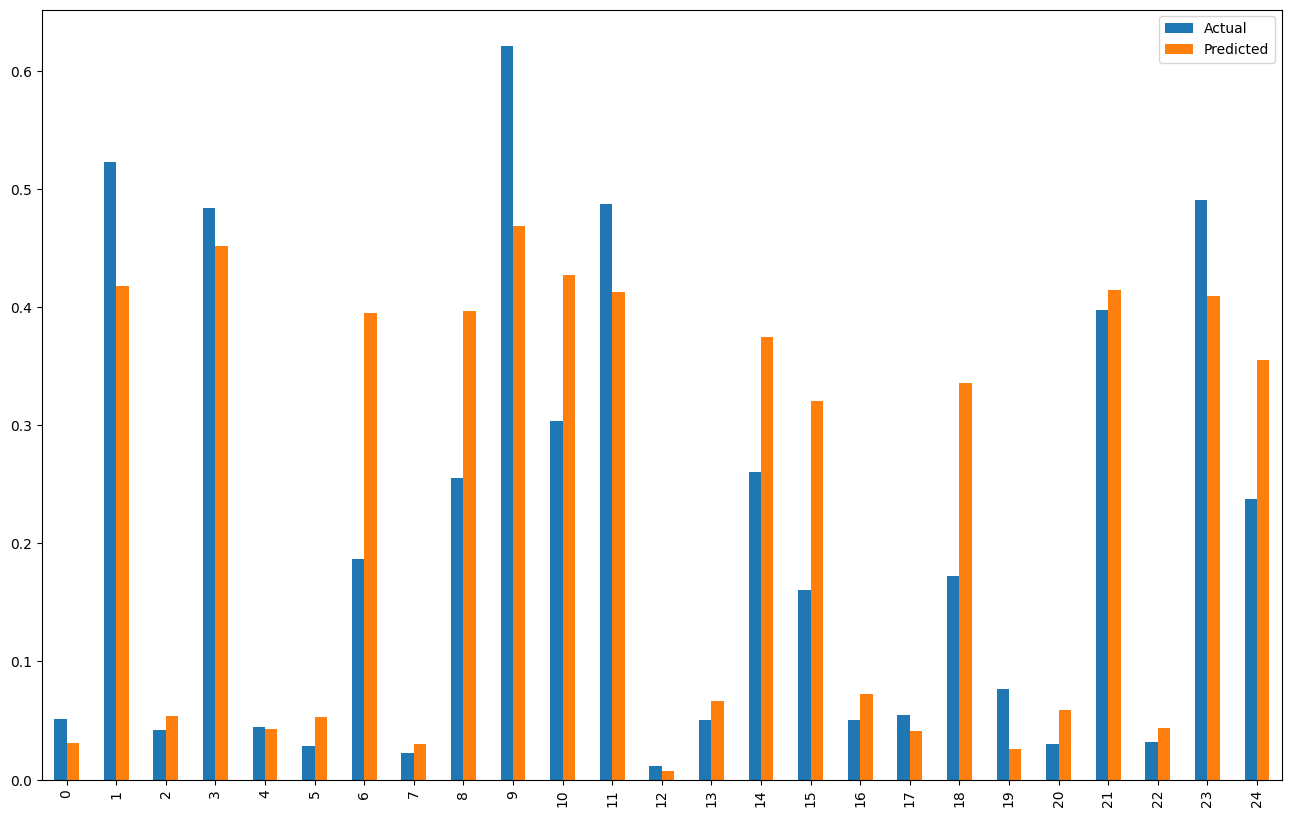

In [98]:
df_lrm = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': lrm_Y_pred.flatten()})


df1 = df_lrm.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
MSE_LR = mean_squared_error(Y_test, lrm_Y_pred)
RMSE_LR = np.sqrt(MSE_LR)
MAE_LR = mean_absolute_error(Y_test, lrm_Y_pred)
R2_LR = r2_score(Y_test, lrm_Y_pred)

# Print metrics
print("MSE:", MSE_LR)
print("RMSE:", RMSE_LR)
print("MAE:", MAE_LR)
print("R2 Score:", R2_LR)


MSE: 0.0033100032850158913
RMSE: 0.057532628003732725
MAE: 0.03789834647589575
R2 Score: 0.9043290504276096


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp


### Model 2 - Decision Tree Regressor



In [100]:
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

dtr_model = DecisionTreeRegressor(criterion='friedman_mse',     # Initialize and fit regressor,The criterion parameter specifies the function that the decision tree algorithm will use to measure the quality of a split during the tree-building process. In this case, 'mse' stands for Mean Squared Error, which is a common criterion for regression problems. It measures the average squared difference between the actual target values and the predicted values. The decision tree algorithm tries to minimize this error when splitting the data.
                             max_depth=3)          #max_depth=3: The max_depth parameter defines the maximum depth of the decision tree. It limits the number of levels (or layers) in the tree. A smaller value, like 3, means that the tree will be relatively shallow, which can help prevent overfitting. Overfitting occurs when a model captures noise in the training data, making it perform poorly on new, unseen data. Setting max_depth can control the complexity of the tree.       

dtr_model = dtr_model.fit(X_train, Y_train)

# Save the model to a file
with open('dtr_model.pkl', 'wb') as file:
    pickle.dump(dtr_model, file)
    
dtr_Y_pred = dtr_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

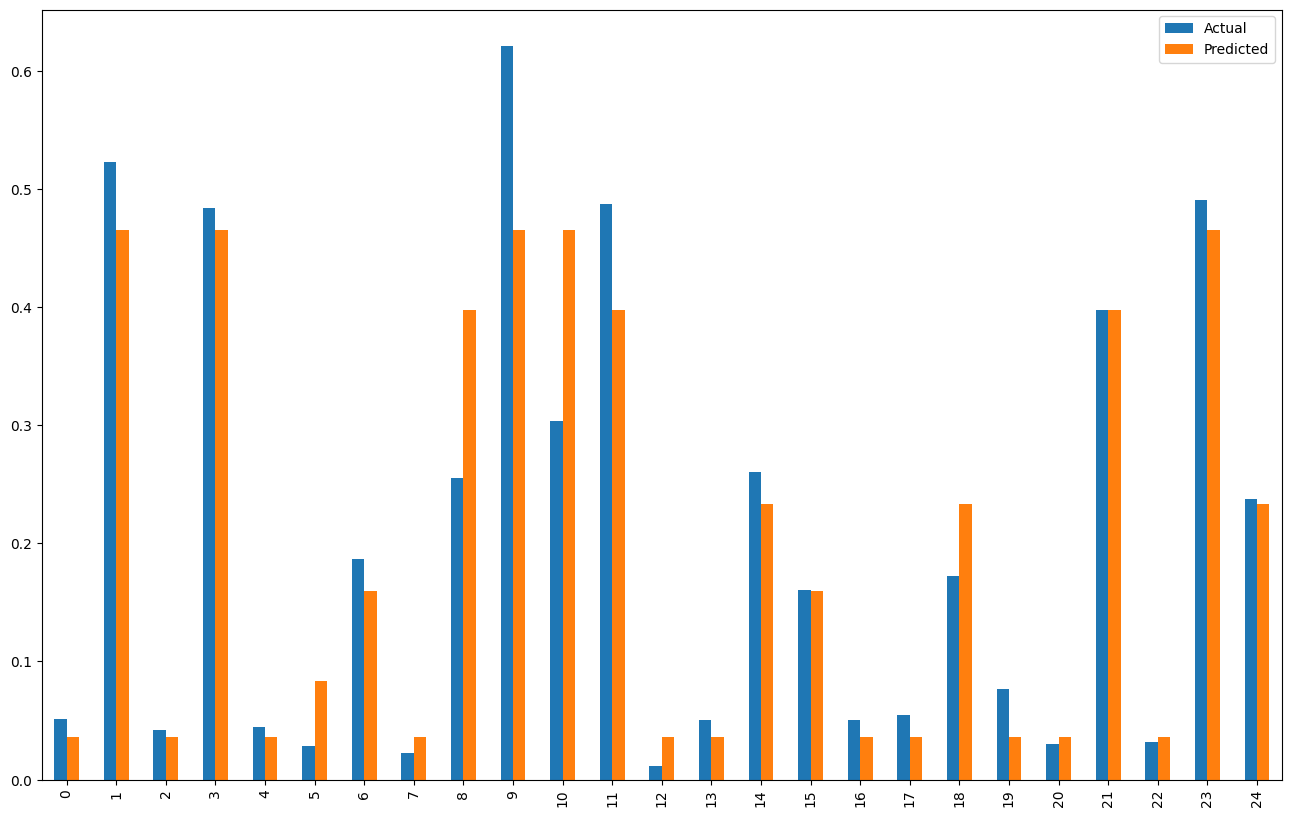

In [101]:
df_dtr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': dtr_Y_pred.flatten()})

df2 = df_dtr.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
MSE_DTR = mean_squared_error(Y_test, dtr_Y_pred)
RMSE_DTR = np.sqrt(MSE_LR)
MAE_DTR = mean_absolute_error(Y_test, dtr_Y_pred)
R2_DTR = r2_score(Y_test, dtr_Y_pred)

# Print metrics
print("MSE:", MSE_DTR)
print("RMSE:", RMSE_DTR)
print("MAE:", MAE_DTR)
print("R2 Score:", R2_DTR)


MSE: 0.0022710801418478217
RMSE: 0.057532628003732725
MAE: 0.0286570661696611
R2 Score: 0.9343576501240429


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

### Model 3 - Random Forest Regressor

In [103]:
 #creating object for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators= 50, random_state= 0) 
rfr_model = rfr_model.fit(X_train,Y_train) 

# Save the model to a file
with open('rfr_model.pkl', 'wb') as file:
    pickle.dump(rfr_model, file)
    
rfr_Y_pred = rfr_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

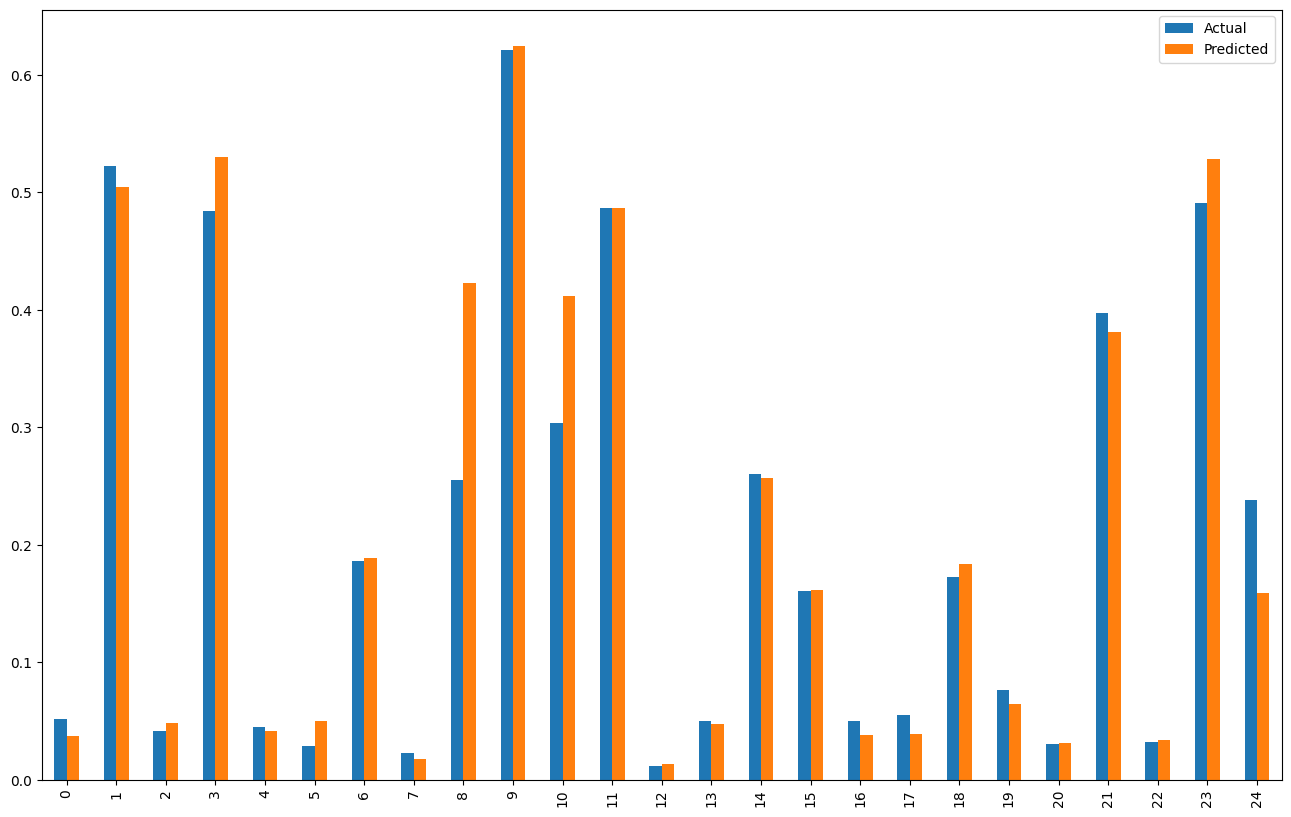

In [104]:
df_rfr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': rfr_Y_pred.flatten()})



df3 = df_rfr.head(25)
df3.plot(kind='bar',figsize=(16,10))
plt.show()


In [105]:
# Calculate metrics
MSE_RFR = mean_squared_error(Y_test, rfr_Y_pred)
RMSE_RFR = np.sqrt(MSE_RFR)
MAE_RFR = mean_absolute_error(Y_test, rfr_Y_pred)
R2_RFR = r2_score(Y_test, rfr_Y_pred)

# Print metrics
print("MSE:", MSE_RFR)
print("RMSE:", RMSE_RFR)
print("MAE:", MAE_RFR)
print("R2 Score:", R2_RFR)

MSE: 0.0017495168857788615
RMSE: 0.04182722660873969
MAE: 0.021824232214934333
R2 Score: 0.9494326961809673


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

### Model 4 XGBRegressor

In [106]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [107]:
import xgboost
from xgboost import XGBRegressor

# Create an XGBRegressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model = xgb_model.fit(X_train,Y_train)

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
    
xgb_Y_pred = xgb_model.predict(X_test)

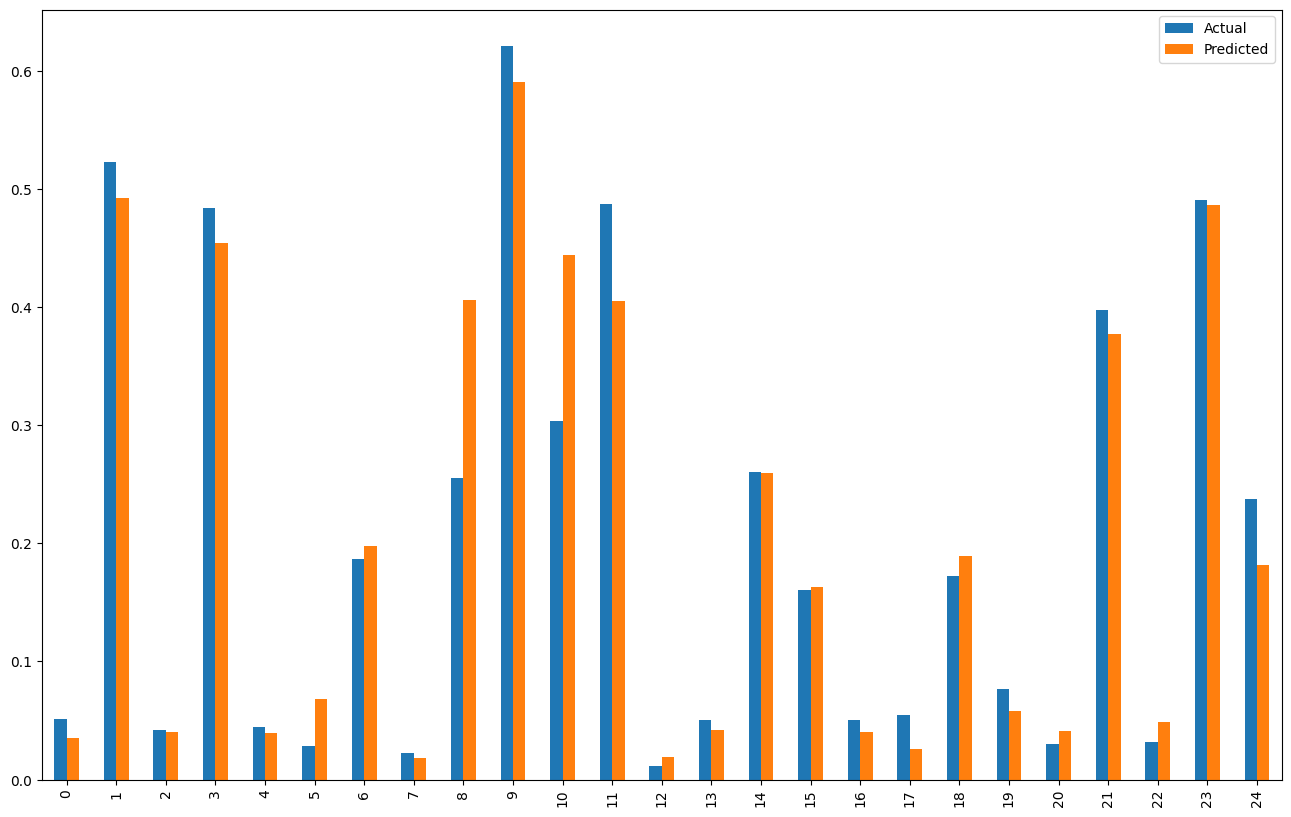

In [108]:
df_xgb = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': xgb_Y_pred.flatten()})
df1 = df_xgb.head(25)
df1.plot(kind='bar',figsize=(16,10))

plt.show()

In [109]:
# Calculate metrics
MSE_XGB = mean_squared_error(Y_test, xgb_Y_pred)
RMSE_XGB = np.sqrt(MSE_XGB)
MAE_XGB = mean_absolute_error(Y_test, xgb_Y_pred)
R2_XGB = r2_score(Y_test, xgb_Y_pred)

# Print metrics
print("MSE:", MSE_XGB)
print("RMSE:", RMSE_XGB)
print("MAE:", MAE_XGB)
print("R2 Score:", R2_XGB)

MSE: 0.0016194296540481025
RMSE: 0.04024213779172402
MAE: 0.02322189318009011
R2 Score: 0.953192683079852


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

## Model 5 - Convulutional Neural Network

In [112]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Building the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))  # Output layer without activation for regression

# Compiling the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Using MSE loss for regression

# Training the model
history = cnn_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Save the model to a file
with open('cnn_model.pkl', 'wb') as file:
    pickle.dump(cnn_model, file)
    

Epoch 1/10
6566/6566 [==============================] - 29s 4ms/step - loss: 0.0024 - mae: 0.0304 - val_loss: 0.0020 - val_mae: 0.0273
Epoch 2/10
6566/6566 [==============================] - 28s 4ms/step - loss: 0.0021 - mae: 0.0279 - val_loss: 0.0020 - val_mae: 0.0277
Epoch 3/10
6566/6566 [==============================] - 27s 4ms/step - loss: 0.0020 - mae: 0.0272 - val_loss: 0.0020 - val_mae: 0.0269
Epoch 4/10
6566/6566 [==============================] - 27s 4ms/step - loss: 0.0020 - mae: 0.0267 - val_loss: 0.0020 - val_mae: 0.0273
Epoch 5/10
6566/6566 [==============================] - 27s 4ms/step - loss: 0.0020 - mae: 0.0265 - val_loss: 0.0020 - val_mae: 0.0265
Epoch 6/10
6566/6566 [==============================] - 26s 4ms/step - loss: 0.0019 - mae: 0.0264 - val_loss: 0.0019 - val_mae: 0.0266
Epoch 7/10
6566/6566 [==============================] - 28s 4ms/step - loss: 0.0019 - mae: 0.0262 - val_loss: 0.0019 - val_mae: 0.0258
Epoch 8/10
6566/6566 [==============================] -

In [113]:
# Save the model weights to a file
cnn_model.save_weights('cnn_model_weights.h5')

# Load the model architecture (you need to recreate the model to load weights)
cnn_model_for_prediction = Sequential()
cnn_model_for_prediction.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model_for_prediction.add(MaxPooling1D(pool_size=2))
cnn_model_for_prediction.add(Flatten())
cnn_model_for_prediction.add(Dense(50, activation='relu'))
cnn_model_for_prediction.add(Dense(1))  # Output layer without activation for regression

# Load the saved weights into the new model
cnn_model_for_prediction.load_weights('cnn_model_weights.h5')

# Make predictions
cnn_Y_pred = cnn_model_for_prediction.predict(X_test)

2814/2814 [==============================] - 4s 1ms/step


In [114]:
# Calculate metrics
MSE_CNN = mean_squared_error(Y_test, cnn_Y_pred)
RMSE_CNN = np.sqrt(MSE_CNN)
MAE_CNN = mean_absolute_error(Y_test, cnn_Y_pred)
R2_CNN = r2_score(Y_test, cnn_Y_pred)

# Print metrics
print("MSE:", MSE_CNN)
print("RMSE:", RMSE_CNN)
print("MAE:", MAE_CNN)
print("R2 Score:", R2_CNN)

MSE: 0.0019600637028311155
RMSE: 0.04427260668665349
MAE: 0.026220530906115733
R2 Score: 0.943347139103722


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

# Model Evaluation

In [116]:


# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBRegressor", "CNN"]
metrics = {
    "MSE": [MSE_LR, MSE_DTR, MSE_RFR, MSE_XGB, MSE_CNN],
    "RMSE": [RMSE_LR, RMSE_DTR, RMSE_RFR, RMSE_XGB, RMSE_CNN],
    "MAE": [MAE_LR, MAE_DTR, MAE_RFR, MAE_XGB, MAE_CNN],
    "R Squared": [R2_LR, R2_DTR, R2_RFR, R2_XGB, R2_CNN]
}

# Create a DataFrame to display the results
results = pd.DataFrame(metrics, index=models)

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results.min().min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results


/tmp/ipykernel_47/4107341359.py:24: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(highlight_min_max)


,MSE,RMSE,MAE,R Squared
Linear Regression,0.003310,0.057533,0.037898,0.904329
Decision Tree Regressor,0.002271,0.057533,0.028657,0.934358
Random Forest Regressor,0.001750,0.041827,0.021824,0.949433
XGBRegressor,0.001619,0.040242,0.023222,0.953193
CNN,0.001960,0.044273,0.026221,0.943347


# TO DO - Remove the findings later, keeping it now so we can use them in report also update values as per the above table

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Findings:</b>
    The table presents an assessment of four distinct regression models, each evaluated based on various performance metrics. To identify the most effective model among them, we can analyze the metrics as follows:

Linear Regression: This model demonstrates an MSE of 0.003370, RMSE of 0.058048, MAE of 0.195535, and an R-squared value of 0.903065.

Decision Tree Regressor: The Decision Tree model achieves an MSE of 0.002328, RMSE of 0.048249, MAE of 0.170366, and an R-squared value of 0.933028.

Random Forest Regressor: Random Forest model achieves an MSE of 0.001788, RMSE of 0.042333, MAE of 0.148927, and an R-squared value of 0.948445.

XGBRegressor: The XGBRegressor model performs notably better with an MSE of 0.001650, RMSE of 0.040622, MAE of 0.153257, and a remarkable R-squared value of 0.952528.

Comparing these models, it is evident that the XGBRegressor outperforms the others. It exhibits the lowest MSE, RMSE, and second lowest MAE, as well as the highest R-squared value. These performance metrics collectively indicate that the XGBRegressor  provides the most accurate and precise predictions among the three options. </div>

<h1 align="center"  style=" color:#fff; background-color:#969696; padding: 8px;">Deployment of the model </h1>

### Implementing the best model to predect Ticket price i.e. XGBRegressor 


In [121]:
# 'airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'

import joblib

def predict_ticket_price(airline,departure_time, stops, class_type, duration, days_left):
    # Encode the categorical features
    airline_mapping = {'SpiceJet':4, 'AirAsia':0, 'Vistara':5, 'Go_First':2, 'Indigo':3, 'Air_India':1}
    #source_city_mapping = {'Delhi': 2, 'Mumbai': 5, 'Bangalore': 0, 'Kolkata': 4, 'Hyderabad': 3, 'Chennai': 1}
    departure_time_mapping = {'Morning': 4, 'Early_Morning': 1, 'Evening': 2, 'Night': 5, 'Afternoon': 0, 'Late_Night': 3}
    #arrival_time_mapping = {'Night': 5, 'Evening': 2, 'Morning': 4, 'Afternoon': 0, 'Early_Morning': 1, 'Late_Night': 3}
    #destination_city_mapping = {'Mumbai': 5, 'Delhi': 2, 'Bangalore': 0, 'Kolkata': 4, 'Hyderabad': 3, 'Chennai': 1}
    class_mapping = {'Economy': 1, 'Business': 0}
    stops_mapping = {'zero': 2, 'one': 0, 'two_or_more': 1}
    
    encoded_airline = airline_mapping.get(airline)
    #encoded_source_city = source_city_mapping.get(source_city)
    encoded_departure_time = departure_time_mapping.get(departure_time)
    #encoded_arrival_time = arrival_time_mapping.get(arrival_time)
    #encoded_destination_city = destination_city_mapping.get(destination_city)
    encoded_class = class_mapping.get(class_type)
    encoded_stops = stops_mapping.get(stops.lower())  # Convert stops value to lowercase before encoding

#new_min = 0
#new_max = 1  # Set your desired maximum value

#duration_min = flightdf['duration'].min()
#duration_max = flightdf['duration'].max()
#days_left_min = flightdf['days_left'].min()
#days_left_max = flightdf['days_left'].max()
#price_min = flightdf['price'].min()
#price_max = flightdf['price'].max()

# Scale 'duration' and 'days_left' as per model data
    scaled_duration = (duration - duration_min) / (duration_max - duration_min) * (new_max - new_min) + new_min
    scaled_days_left = (days_left - days_left_min) / (days_left_max - days_left_min) * (new_max - new_min) + new_min
    
    # Create a list with the encoded features
    input_data = [encoded_airline, encoded_departure_time, encoded_stops, encoded_class, scaled_duration, scaled_days_left]
    
    # Make the prediction using the best model that is XGBRegressor .
    predicted_price = (xgb_model.predict([input_data])[0]).round(2) 
    
    return predicted_price

In [122]:
flightdf.columns

Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [123]:
#airline	'airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'

predicted_price = predict_ticket_price('Vistara', 'Morning', 'one', 'Economy',4,6)

#reverse transforming the MIN-MAXed Predicted price. 
reversed_predicted_value = round(((predicted_price - new_min) * (price_max - price_min) / (new_max - new_min) + price_min),2)

# Print the reversed value
print(f'Predicted ticket price: ₹{reversed_predicted_value}')


Predicted ticket price: ₹7203.3


### Created GUI to predict the flight price 

Developing a user-friendly graphical interface (GUI) for effortless input of variables into the model, enabling the prediction of the price. The below code will work in Jupyter note book. Make sure to replace the picture path in bg_image = Image.open("Flight pic.png")


import tkinter as tk
from tkinter import ttk
from tkinter import StringVar
from PIL import Image, ImageTk

# Function to update class options based on the selected airline
def update_class_options(event):
    selected_airline = airline_var.get()
    if selected_airline in ["Air India", "Vistara"]:
        class_option_menu['state'] = 'readonly'
    else:
        class_var.set(classes[0])  # Reset to "Economy"
        class_option_menu['state'] = 'disabled'

# Function to predict and reverse
def predict_and_reverse():
    airline = airline_var.get()
    departure_time = departure_time_var.get()
    stops = stops_var.get()
    class_type = class_var.get()
    duration = float(duration_entry.get())
    days_left = float(days_left_entry.get())

    # Call the predict_ticket_price function to get the predicted price
    predicted_price = predict_ticket_price(airline, departure_time, stops, class_type, duration, days_left)

    # Now, you can reverse the scaling using the formula and round to 2 decimal places
    reversed_predicted_value = (predicted_price - new_min) * (price_max - price_min) / (new_max - new_min) + price_min
    reversed_predicted_value = round(reversed_predicted_value, 2)

    # Update the result_label with the reversed predicted value and set the color
    if class_type == "Economy":
        result_label.config(text=f'Predicted Economy Ticket Price: ₹{reversed_predicted_value}', foreground='green')
    elif class_type == "Business":
        result_label.config(text=f'Predicted Business Ticket Price: ₹{reversed_predicted_value}', foreground='red')

# Create the main window
window = tk.Tk()
window.title("Flight Ticket Price Predictor")
window.geometry("800x600")
window.configure(bg='white')  # Set a white background

# Load and resize the background image
bg_image = Image.open("Flight pic.png")  # Replace with your image file
bg_image = bg_image.resize((800, 600), Image.LANCZOS)
bg_photo = ImageTk.PhotoImage(bg_image)

# Create a label to display the background image
bg_label = tk.Label(window, image=bg_photo)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Set a common text size
text_size = 14

# Create a frame for the content with a border
content_frame = ttk.Frame(window, style="Border.TFrame")  # Use a ttk.Frame
content_frame.place(relx=0.5, rely=0.5, anchor="center")

# Create a style for the bordered frame
style = ttk.Style()
style.configure("Border.TFrame", borderwidth=50, relief="solid")

# Rest of your code for GUI elements (labels, comboboxes, entry, buttons) goes here...

# Create and pack GUI elements
element_padding = 10

# Create dropdowns using ttk.Combobox
airline_label = ttk.Label(content_frame, text="Select Airline:")
airline_label.grid(row=0, column=0, sticky='w')
airlines = ["", "SpiceJet", "AirAsia", "Vistara", "Go_First", "Indigo", "Air India"]
airline_var = StringVar()
airline_var.set("")  # Blank initial selection
airline_option_menu = ttk.Combobox(content_frame, textvariable=airline_var, values=airlines, width=21)  # Adjust width
airline_option_menu.grid(row=0, column=1, sticky='w')
airline_option_menu.bind("<<ComboboxSelected>>", update_class_options)

departure_time_label = ttk.Label(content_frame, text="Select Departure Time:")
departure_time_label.grid(row=1, column=0, sticky='w')
departure_times = ["", "Morning", "Early_Morning", "Evening", "Night", "Afternoon", "Late_Night"]
departure_time_var = StringVar()
departure_time_var.set("")  # Blank initial selection
departure_time_option_menu = ttk.Combobox(content_frame, textvariable=departure_time_var, values=departure_times, width=21)  # Adjust width
departure_time_option_menu.grid(row=1, column=1, sticky='w')

stops_label = ttk.Label(content_frame, text="Select Stops:")
stops_label.grid(row=2, column=0, sticky='w')
stops = ["", "zero", "one", "two_or_more"]
stops_var = StringVar()
stops_var.set("")  # Blank initial selection
stops_option_menu = ttk.Combobox(content_frame, textvariable=stops_var, values=stops, width=21)  # Adjust width
stops_option_menu.grid(row=2, column=1, sticky='w')

class_label = ttk.Label(content_frame, text="Select Class:")
class_label.grid(row=3, column=0, sticky='w')
classes = ["Economy", "Business"]
class_var = StringVar()
class_var.set(classes[0])
class_option_menu = ttk.Combobox(content_frame, textvariable=class_var, values=classes, width=21)  # Adjust width
class_option_menu.grid(row=3, column=1, sticky='w')

duration_label = ttk.Label(content_frame, text="Duration:")
duration_label.grid(row=4, column=0, sticky='w')
duration_entry = ttk.Entry(content_frame, font=("Arial", 8), textvariable=StringVar(), width=5)  # Set width
duration_entry.grid(row=4, column=1, sticky='w')

days_left_label = ttk.Label(content_frame, text="Days Left:")
days_left_label.grid(row=5, column=0, sticky='w')
days_left_entry = ttk.Entry(content_frame, font=("Arial", 8), textvariable=StringVar(), width=5)  # Set width
days_left_entry.grid(row=5, column=1, sticky='w')

predict_button = ttk.Button(content_frame, text="Predict Price", command=predict_and_reverse)
predict_button.grid(row=6, column=0, columnspan=2, pady=element_padding)

result_label = ttk.Label(content_frame, text="", font=("Arial", 15))
result_label.grid(row=7, column=0, columnspan=2, pady=element_padding)

# Start the GUI event loop
window.mainloop()


<h1 align="center"  style=" color:#fff; background-color:#969696; padding: 8px;">Conclusion </h1>

<div class="alert alert-block alert-success"  style="font-size:16px">
<li><b></b>We addressed a regression problem with a continuous target variable, focusing on predicting prices. After a rigorous modeling process, we found that the XGBoost (XGB) regressor emerged as the best model among the four models, achieving a high R-squared value of 0.95. This indicates that the model explains a substantial portion of the variance in the target variable.<p><br/></li>
    <li><b></b>Our approach was characterized by an iterative and systematic methodology. We made several attempts to enhance model accuracy, including the implementation of different feature selection methods and scaling of categorical variables. However, scaling of categorical variables did not yield a significant improvement in model accuracy.<p><br/></li>
    <li><b></b>Overall, the choice of the XGB regressor as the final model with a strong R-squared value suggests that it is a robust and accurate solution for our regression problem, and further fine-tuning or feature engineering may not be necessary given the high level of predictive power already achieved.<p><br/></li>
</div>